In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

from main_v3 import ChessPositionDetector

In [8]:
position_detector = ChessPositionDetector(use_detr=True)

In [9]:
def expand_fen(fen):
    rows = fen.split("/")
    expanded_fen = ""
    for row in rows:
        for char in row:
            if char.isdigit():
                expanded_fen += "x" * int(char)
            else:
                expanded_fen += char
    return expanded_fen

def calculate_fen_accuracy(detected_fen, ground_truth_fen):
    detected_expanded = expand_fen(detected_fen)
    ground_truth_expanded = expand_fen(ground_truth_fen)

    correct_squares = sum(1 for d, g in zip(detected_expanded, ground_truth_expanded) if d == g)

    accuracy = correct_squares / 64 * 100

    return accuracy

In [10]:
images_path = "test_images"
images = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

fen_accuracies = []
for image_name in images:
    image_path = os.path.join(images_path, image_name)
    image = cv2.imread(image_path)
    fen_file_path = image_path.replace('.jpg', '.fen')
    with open(fen_file_path, 'r') as f:
        true_fen = f.read().strip()
    detected_fen = position_detector(image)

    accuracy = calculate_fen_accuracy(detected_fen, true_fen)
    fen_accuracies.append(accuracy)
    print(f"FEN Accuracy for {image_name}: {accuracy:.2f}%")

FEN Accuracy for 20251219_112440.jpg: 96.88%
FEN Accuracy for 20251219_113457.jpg: 93.75%
FEN Accuracy for 20251219_113609.jpg: 100.00%
FEN Accuracy for 20251219_113451.jpg: 98.44%
Detected white edge with bw_threshold=90
FEN Accuracy for 20251219_112442.jpg: 95.31%
FEN Accuracy for 20251219_113503.jpg: 95.31%
FEN Accuracy for 20251219_112133.jpg: 93.75%
FEN Accuracy for 20251219_112607.jpg: 95.31%
Detected white edge with bw_threshold=110
FEN Accuracy for 20251219_112622.jpg: 87.50%
FEN Accuracy for 20251219_113614.jpg: 98.44%
FEN Accuracy for 20251219_112454.jpg: 93.75%
FEN Accuracy for 20251219_113315.jpg: 93.75%
FEN Accuracy for 20251219_112332.jpg: 95.31%
!!!! Failed to detect board orientation.
FEN Accuracy for 20251219_113605.jpg: 65.62%
FEN Accuracy for 20251219_113623.jpg: 98.44%
Detected white edge with bw_threshold=110
FEN Accuracy for 20251219_112618.jpg: 35.94%
FEN Accuracy for 20251219_113321.jpg: 95.31%
Detected white edge with bw_threshold=90
FEN Accuracy for 20251219_1

In [12]:
average_accuracy = sum(fen_accuracies) / len(fen_accuracies)
print(f"Average FEN Accuracy: {average_accuracy:.2f}%")

Average FEN Accuracy: 88.98%


In [ ]:
fen_accuracies.sort()
index_90th = int(0.9 * len(fen_accuracies)) - 1
print(f"90th Percentile FEN Accuracy: {fen_accuracies[index_90th]:.2f}%")

90th Percentile FEN Accuracy: 98.44%


In [17]:
less_than_90 = sum(1 for acc in fen_accuracies if acc < 90)
less_than_90_percentage = (less_than_90 / len(fen_accuracies)) * 100
print(f"Percentage of images with FEN accuracy less than 90%: {less_than_90_percentage:.2f}%")
print(f"Percentage of images with FEN accuracy 90% or higher: {100 - less_than_90_percentage:.2f}%")

Percentage of images with FEN accuracy less than 90%: 21.43%
Percentage of images with FEN accuracy 90% or higher: 78.57%


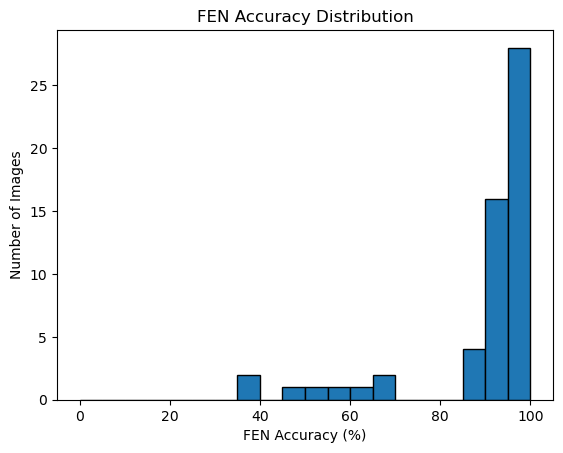

In [ ]:
plt.hist(fen_accuracies, bins=20, range=(0, 100), edgecolor='black')
plt.title('FEN Accuracy Distribution')
plt.xlabel('FEN Accuracy (%)')
plt.ylabel('Number of Images')
plt.show()